<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("D.csv")
dataset.shape
dataset.isnull().sum()

**Data Balancing**

In [ ]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 16.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
# Data preprocessing
y = dataset['status'].values
X = dataset.drop(['status'],axis=1)
X=X.values
print(X)
print(y)

[[ 0  0  1 ...  0  0  0]
 [ 0  0  1 ...  0  1  0]
 [ 0  0  1 ...  0  1  0]
 ...
 [11  0  1 ...  1  1  0]
 [ 2  0  1 ...  1  1  1]
 [12  1  0 ...  1  0  1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [ ]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 79, 1: 64})


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 79, 1: 79})


**Data Preprocessing for Train and Testing**

In [ ]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Multinomeal Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
y_test_prediction = mnb.predict(X_test)

In [ ]:
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
def conf_mat(d1,d2):
  cm = metrics.confusion_matrix(d1, d2)
  ax = sns.heatmap(cm,  fmt='6', annot=True, cmap='hot_r')
  sns.set(font_scale=1.5)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Multinomeal Naive Bayes


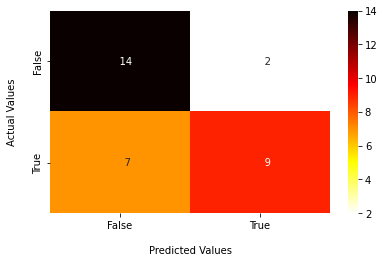

In [ ]:
print("Confusion Matrix of Multinomeal Naive Bayes") 
conf_mat(y_test, y_test_prediction)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2))
  print("F1-Score :",f1) 


In [ ]:
performance("Multinomeal Naive Bayes",y_test, y_test_prediction)

Model Name is : Multinomeal Naive Bayes
Accuracy : 71.875
Precision : 81.81818181818183
Recall : 56.25
F1-Score : 0.6666666666666666


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(d1, d2):
  fpr, tpr, thresholds = roc_curve(d1, d2)
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

AUC score of Multinomeal Naive Bayes: 0.71875


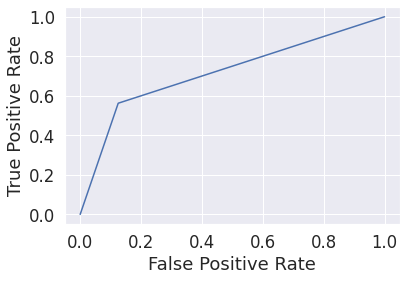

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Multinomeal Naive Bayes: {roc_auc_score(y_test, y_test_prediction)}')

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_test_prediction = lr.predict(X_test)

Confusion Matrix of Logistic Regression


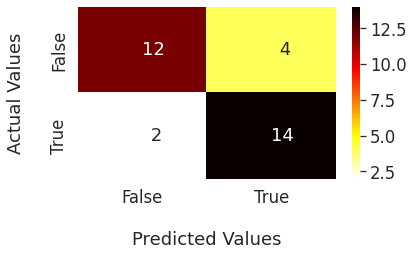

In [ ]:
print("Confusion Matrix of Logistic Regression") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Logistic Regression",y_test, y_test_prediction)

Model Name is : Logistic Regression
Accuracy : 81.25
Precision : 77.77777777777779
Recall : 87.5
F1-Score : 0.823529411764706


AUC score of Logistic Regression: 0.8125


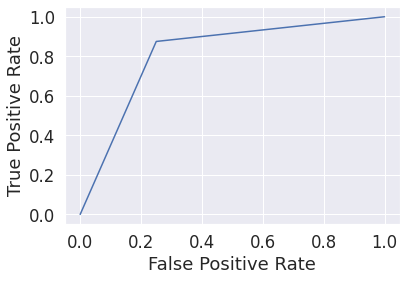

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Logistic Regression: {roc_auc_score(y_test, y_test_prediction)}')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)
y_test_prediction = knn.predict(X_test)

Confusion Matrix of KNN


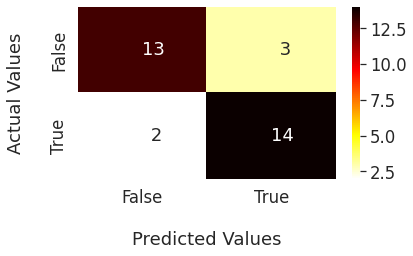

In [ ]:
print("Confusion Matrix of KNN") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("KNN",y_test, y_test_prediction)

Model Name is : KNN
Accuracy : 84.375
Precision : 82.35294117647058
Recall : 87.5
F1-Score : 0.8484848484848485


AUC score of KNN: 0.84375


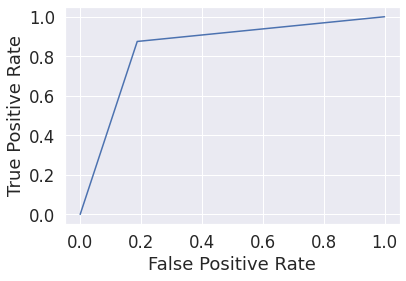

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of KNN: {roc_auc_score(y_test, y_test_prediction)}')

**SVM**

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(X_train, y_train)
y_test_prediction = svm.predict(X_test)

Confusion Matrix of KNN


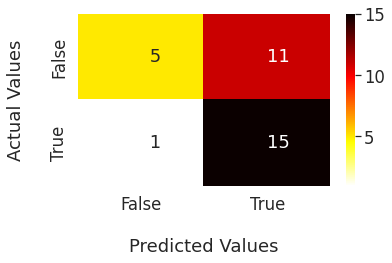

In [ ]:
print("Confusion Matrix of KNN") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("KNN",y_test, y_test_prediction)

Model Name is : KNN
Accuracy : 62.5
Precision : 57.692307692307686
Recall : 93.75
F1-Score : 0.7142857142857143


AUC score of KNN: 0.625


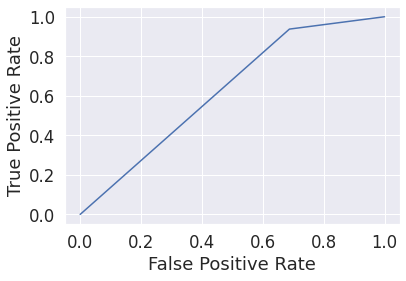

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of KNN: {roc_auc_score(y_test, y_test_prediction)}')

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)

Confusion Matrix of Decision Tree


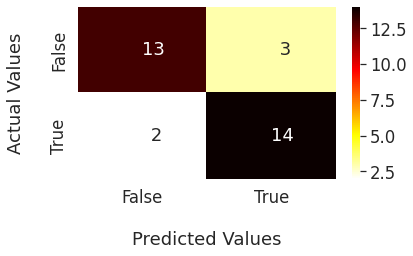

In [ ]:
print("Confusion Matrix of Decision Tree") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Decision Tree",y_test, y_test_prediction)

Model Name is : Decision Tree
Accuracy : 84.375
Precision : 82.35294117647058
Recall : 87.5
F1-Score : 0.8484848484848485


AUC score of Decision Tree: 0.84375


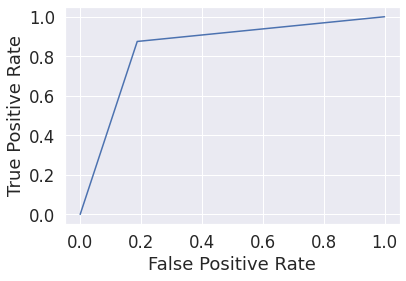

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Decision Tree: {roc_auc_score(y_test, y_test_prediction)}')

**K-means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
y_test_prediction=kmeans.predict(X_test)

Confusion Matrix of K-means


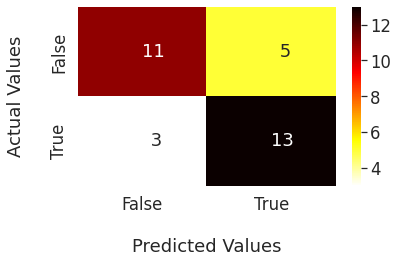

In [ ]:
print("Confusion Matrix of K-means") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("K-means",y_test, y_test_prediction)

Model Name is : K-means
Accuracy : 75.0
Precision : 72.22222222222221
Recall : 81.25
F1-Score : 0.7647058823529411


AUC score of K-means: 0.75


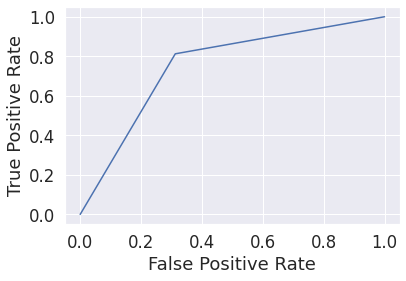

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of K-means: {roc_auc_score(y_test, y_test_prediction)}')

**Begging Method**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
y_test_prediction = bg.predict(X_test)

Confusion Matrix of Begging


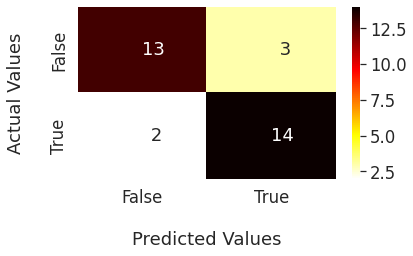

In [ ]:
print("Confusion Matrix of Begging") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Begging",y_test, y_test_prediction)

Model Name is : Begging
Accuracy : 84.375
Precision : 82.35294117647058
Recall : 87.5
F1-Score : 0.8484848484848485


AUC score of Begging: 0.84375


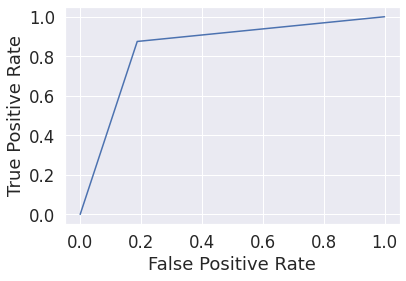

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Begging: {roc_auc_score(y_test, y_test_prediction)}')

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
y_test_prediction = adb.predict(X_test)

Confusion Matrix of Ada Boost


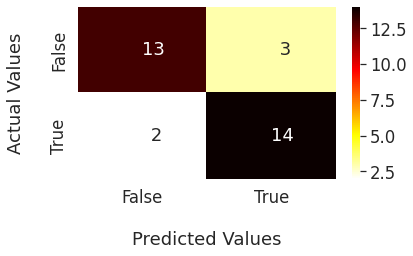

In [ ]:
print("Confusion Matrix of Ada Boost") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Ada Boost",y_test, y_test_prediction)

Model Name is : Ada Boost
Accuracy : 84.375
Precision : 82.35294117647058
Recall : 87.5
F1-Score : 0.8484848484848485


AUC score of Ada Boost: 0.84375


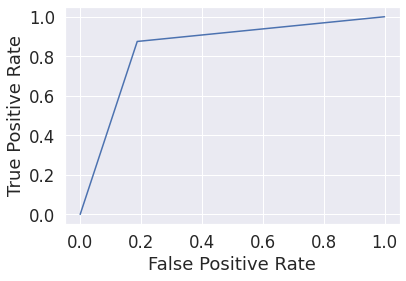

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Ada Boost: {roc_auc_score(y_test, y_test_prediction)}')

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

Confusion Matrix of Random Forest


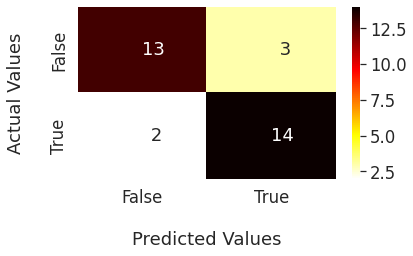

In [ ]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 84.375
Precision : 82.35294117647058
Recall : 87.5
F1-Score : 0.8484848484848485


AUC score of Random Forest: 0.84375


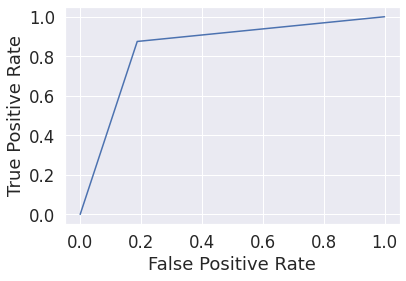

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Random Forest: {roc_auc_score(y_test, y_test_prediction)}')

**Multi Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
y_test_prediction = evc.predict(X_test)

Confusion Matrix of Voting


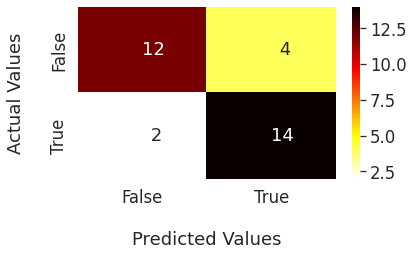

In [ ]:
print("Confusion Matrix of Voting") 
conf_mat(y_test, y_test_prediction)

In [ ]:
performance("Voting",y_test, y_test_prediction)

Model Name is : Voting
Accuracy : 81.25
Precision : 77.77777777777779
Recall : 87.5
F1-Score : 0.823529411764706


AUC score of Voting: 0.8125


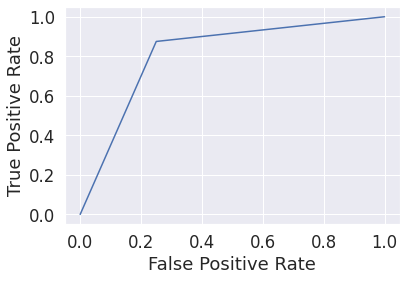

In [ ]:
plot_roc_curve(y_test, y_test_prediction)
print(f'AUC score of Voting: {roc_auc_score(y_test, y_test_prediction)}')